### Sentiment Analysis
* The objetive is to run a classification model of sentiment (binary), with books reviews data with NLP approaches.
* Model results: with the Naive Bayes Classifer gets an accuracy of 80% and recall of 81%.

In [ ]:
import nltk
import re
import numpy as np
import pandas as pd
import random
import sklearn
import matplotlib.pyplot as plt
nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize 
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
#conection with Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tarfile

file = tarfile.open('/content/drive/MyDrive/Colab Notebooks/Bases/processed_acl.tar.gz')
file.extractall('./data_reviews') 
file.close()

# classify the files if has negative or positive reviews

negative_file = open('data_reviews/processed_acl/books/negative.review', 'r').read()
positive_file = open('data_reviews/processed_acl/books/positive.review', 'r').read()

In [ ]:
# the data comes like this, the next step is to transform it to a bag of words
negative_file[:100]

'avid:1 your:1 horrible_book:1 wasted:1 use_it:1 the_entire:1 money.i:1 i_lit:1 i_read:1 lit:1 i_woul'

In [ ]:
# stopwords in a list
stop = stopwords.words('english')
# split the dataset with regex
key_positive = re.findall('([\S]+):',positive_file)
key_negative = re.findall('([\S]+):',negative_file)
# collect all the words and filter not in stopwords
all_words = key_positive + key_negative
all_words = [word for word in all_words if word not in stop]
# get the frequency 
fdist = nltk.FreqDist(all_words)
print('in the BOW we got: {} potential features'.format(len(fdist)))

in the BOW we got: 195777 potential features


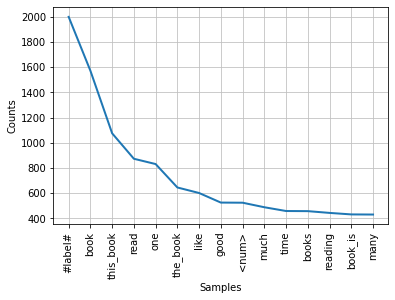

In [ ]:
# visualization of word frequency
fdist.plot(15)

In [ ]:
## the first loop is to split the dataset in words, the second one joins that in sentences

#### NEGATIVE
keys = []
pos_keys = []
new_keys = []
labels = []

for line in negative_file.split('#label#:negative\n'):
  keys.append(re.findall('([\S]+):',line))

for word in keys:
  new_keys.append(' '.join(word))
  labels.append('negative')

#### POSITIVE

for line_pos in positive_file.split('#label#:positive\n'):
  pos_keys.append(re.findall('([\S]+):',line_pos))

for word_pos in pos_keys:
  new_keys.append(' '.join(word_pos))
  labels.append('positive')  

print(len(new_keys)==len(labels))  


True


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# remove the stopwords before vectorize it 
vector_alg = CountVectorizer(stop_words=stop)
vector_alg.fit(new_keys)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [ ]:
# transform all the dataset into a vector of 1 and 0
bag_words = vector_alg.transform(new_keys)
bag_words.shape

(2002, 181437)

In [ ]:
train_vectors, test_vectors, train_labels, test_labels = train_test_split(bag_words, labels, test_size=0.3, random_state=42)

### Classification models
* The Multinomial Naive Bayes gets the best accuracy and recall (80% - 81%).

In [ ]:
# try different models 
clf = MultinomialNB().fit(train_vectors, train_labels)
log = LogisticRegression().fit(train_vectors, train_labels)
tree = DecisionTreeClassifier().fit(train_vectors, train_labels)

In [ ]:
print('Multinomial Naive Bayes')
print('Accuracy:', sklearn.metrics.accuracy_score(clf.predict(test_vectors), test_labels))
print('Recall:',sklearn.metrics.recall_score(clf.predict(test_vectors), test_labels, average="binary", pos_label="positive"))
print('')
print('Logistic Regression')
print('Accuracy:',sklearn.metrics.accuracy_score(log.predict(test_vectors), test_labels))
print('Recall:',sklearn.metrics.recall_score(log.predict(test_vectors), test_labels, average="binary", pos_label="positive"))
print('')
print('Decission Tree Classifier')
print('Accuracy:',sklearn.metrics.accuracy_score(tree.predict(test_vectors), test_labels))
print('Recall:',sklearn.metrics.recall_score(tree.predict(test_vectors), test_labels, average="binary", pos_label="positive"))

Multinomial Naive Bayes
Accuracy: 0.8036605657237936
Recall: 0.8142857142857143

Logistic Regression
Accuracy: 0.7803660565723793
Recall: 0.7682119205298014

Decission Tree Classifier
Accuracy: 0.6871880199667221
Recall: 0.673202614379085


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


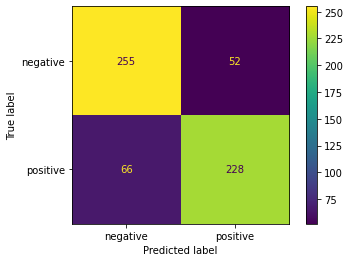

In [ ]:
# results of the best model (Multinomial Naive Bayes)
sklearn.metrics.plot_confusion_matrix(clf, test_vectors, test_labels);

In [ ]:
# another try
clf.predict(vector_alg.transform(['this book is the worst thing i have ever read', 'give a nobel prize for the autor', 'not a good story']))

array(['negative', 'positive', 'negative'], dtype='<U8')